# Table of Cell Areas for H3 Resolutions

| H3 | Average Hexagon Area (km2) | Average Hexagon Edge Length (km) | Number of unique indexes |
|:---|:---------------------------|:---------------------------------|:---------------------------|
| 0 | 4,250,546.8477000 | 1,107.712591000 | 122
| 1	| 607,220.9782429 | 418.676005500 | 842
| 2	| 86,745.8540347 | 158.244655800 | 5,882
| 3	| 12,392.2648621 | 59.810857940 | 41,162
| 4	| 1,770.3235517 | 22.606379400 | 288,122
| 5	| 252.9033645 | 8.544408276 | 2,016,842
| 6	| 36.1290521 | 3.229482772 | 14,117,882
| 7	| 5.1612932 | 1.220629759 | 98,825,162
| 8	| 0.7373276 | 0.461354684 | 691,776,122
| 9	| 0.1053325 | 0.174375668 | 4,842,432,842
| 10 | 0.0150475 | 0.065907807 | 33,897,029,882
| 11 | 0.0021496 | 0.024910561 | 237,279,209,162
| 12 | 0.0003071 | 0.009415526 | 1,660,954,464,122
| 13 | 0.0000439 | 0.003559893 | 11,626,681,248,842
| 14 | 0.0000063 | 0.001348575 | 81,386,768,741,882
| 15 | 0.0000009 | 0.000509713 | 569,707,381,193,162

# Installing

In [80]:
!pip install h3

# H3 Tutorial

In [201]:
%pylab inline

import branca.colormap as cm

from h3 import h3
from shapely.geometry import Point, Polygon
from geopy.distance import distance

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Location to H3 and vice versa

In [368]:
gangnam = [37.508811, 127.040978]
hongdae = [37.557435, 126.925808]

gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=5)
loc = h3.h3_to_geo(gangnam_h3)

print('강남 원래 좌표  :', gangnam)
print('강남 H3 중심좌표:', loc)
print('강남 H3       :', h3_loc)

강남 원래 좌표  : [37.508811, 127.040978]
강남 H3 중심좌표: [37.468877275742344, 127.06257021363524]
강남 H3       : 8630e1ca7ffffff


In [371]:
def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))
    
df = gpd.GeoDataFrame({'h3': [gangnam_h3]})
df['geometry'] = df['h3'].apply(to_polygon)
df.crs = {'init': 'epsg:4326'}
display(df)

m = folium.Map(gangnam, zoom_start=12)
folium.GeoJson(df).add_to(m)
m

,h3,geometry
0,8530e1cbfffffff,"POLYGON ((127.147336245909 37.45816646841992, ..."


## Grid Distance (H3 사이의 거리 구하기)

h3.h3_distance 함수를 사용하면 됩니다. <br>
이때 나오는 수치는 두 H3 사이의 몇개의 grid가 있는지를 나타냅니다. <br>
(즉 미터나, 킬러미터같은 단위가 아닙니다.)

In [258]:
gangnam = [37.508811, 127.040978]
hongdae = [37.557435, 126.925808]

gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=10)
hongdae_h3 = h3.geo_to_h3(hongdae[0], hongdae[1], res=10)
dist = h3.h3_distance(gangnam_h3, hongdae_h3)

print('gangnam_h3:', gangnam_h3)
print('hongdae_h3:', hongdae_h3)
print('distance  :', dist)

gangnam_h3: 8a30e1ca390ffff
hongdae_h3: 8a30e1d84797fff
distance  : 126


만약 서로 resolution이 다를시 -1을 리턴시킵니다.

In [259]:
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=8)
hongdae_h3 = h3.geo_to_h3(hongdae[0], hongdae[1], res=7)
dist = h3.h3_distance(gangnam_h3, hongdae_h3)

print('gangnam_h3:', gangnam_h3)
print('hongdae_h3:', hongdae_h3)
print('distance  :', dist)

gangnam_h3: 8830e1ca39fffff
hongdae_h3: 8730e1d84ffffff
distance  : -1


## Resolution 알아내기 

In [261]:
gangnam = [37.508811, 127.040978]
hongdae = [37.557435, 126.925808]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=8)

res = h3.h3_get_resolution(gangnam_h3)
print('강남 resolution:', res)

강남 resolution: 8


## Shapely 사용

[[37.45816646841992, 127.14733624590899],
 [37.5327646461389, 127.11077458956521],
 [37.54339024507392, 127.0259643444913],
 [37.47951133913293, 126.97790913519783],
 [37.405041009311994, 127.01450132231741],
 [37.39432184126186, 127.09911844988092]]

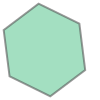

In [264]:
locations = h3.h3_to_geo_boundary(h3_loc)
display(locations)
Polygon(locations)

## Neighbors인지 체크

h3_indexes_are_neighbors 함수를 통해서 neighbor인지 아닌지를 판단 할 수 있습니다.

In [304]:
gangnam = [37.508811, 127.040978]
hongdae = [37.557435, 126.925808]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=10)
hongdae_h3 = h3.geo_to_h3(hongdae[0], hongdae[1], res=10)
is_neighbor = h3.h3_indexes_are_neighbors(gangnam_h3, hongdae_h3)

print('강남 - 홍대:', is_neighbor)

강남 - 홍대: False


## Neighbors 꺼내기
neighbors 를 꺼내기 위해서는 k_ring 함수를 사용합니다.

In [399]:
gangnam = [37.508811, 127.040978]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=7)
neighbors = h3.k_ring(gangnam_h3, ring_size=2)
display(neighbors)

rand_h3 = np.random.choice(list(neighbors))
is_neighbor = h3.h3_indexes_are_neighbors(gangnam_h3, rand_h3)

print('강남 H3   :', gangnam_h3)
print('랜덤 H3   :', rand_h3)
print('강남 - 랜덤:', is_neighbor)

{'8730e1c12ffffff',
 '8730e1c80ffffff',
 '8730e1c81ffffff',
 '8730e1c84ffffff',
 '8730e1c85ffffff',
 '8730e1c86ffffff',
 '8730e1ca0ffffff',
 '8730e1ca1ffffff',
 '8730e1ca2ffffff',
 '8730e1ca3ffffff',
 '8730e1ca4ffffff',
 '8730e1ca5ffffff',
 '8730e1ca6ffffff',
 '8730e1ca8ffffff',
 '8730e1caaffffff',
 '8730e1cacffffff',
 '8730e1caeffffff',
 '8730e1cb1ffffff',
 '8730e1cb5ffffff'}

강남 H3   : 8730e1ca3ffffff
랜덤 H3   : 8730e1c85ffffff
강남 - 랜덤: True


In [402]:
def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))
    
df = gpd.GeoDataFrame({'h3': list(neighbors)})
df['geometry'] = df['h3'].apply(to_polygon)
df.crs = {'init': 'epsg:4326'}
display(df.head())

m = folium.Map(gangnam, zoom_start=12)
folium.GeoJson(df).add_to(m)

for _h3 in neighbors:
    loc = h3.h3_to_geo(_h3)
    folium.Marker(loc).add_to(m)
m

,h3,geometry
0,8730e1c81ffffff,"POLYGON ((127.0936624957004 37.47494887237965,..."
1,8730e1ca0ffffff,"POLYGON ((127.0416596380399 37.51146133502923,..."
2,8730e1ca6ffffff,"POLYGON ((127.0226840588836 37.50385231791471,..."
3,8730e1cb1ffffff,"POLYGON ((127.0383706168461 37.47192339995248,..."
4,8730e1ca8ffffff,"POLYGON ((127.0969880563556 37.51450591115271,..."


## Validation of H3

In [322]:
gangnam = [37.508811, 127.040978]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=10)

print(f'강남    ({gangnam_h3}):', h3.h3_is_valid(gangnam_h3))
print('이상한데 (8a30e1ca390afff):', h3.h3_is_valid('8a30e1ca390afff'))

강남    (8a30e1ca390ffff): True
이상한데 (8a30e1ca390afff): False


## Children 가져오기

In [434]:
gangnam = [37.508811, 127.040978]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=9)

children_h3 = h3.h3_to_children(gangnam_h3, 11)
print(children_h3)

{'8b30e1ca3911fff', '8b30e1ca391bfff', '8b30e1ca3905fff', '8b30e1ca3906fff', '8b30e1ca3912fff', '8b30e1ca390afff', '8b30e1ca3929fff', '8b30e1ca3936fff', '8b30e1ca390dfff', '8b30e1ca3928fff', '8b30e1ca3918fff', '8b30e1ca3920fff', '8b30e1ca392bfff', '8b30e1ca391afff', '8b30e1ca3924fff', '8b30e1ca3901fff', '8b30e1ca3900fff', '8b30e1ca391dfff', '8b30e1ca392efff', '8b30e1ca3904fff', '8b30e1ca390bfff', '8b30e1ca392cfff', '8b30e1ca392afff', '8b30e1ca3935fff', '8b30e1ca390cfff', '8b30e1ca3909fff', '8b30e1ca3915fff', '8b30e1ca3913fff', '8b30e1ca3903fff', '8b30e1ca3933fff', '8b30e1ca3910fff', '8b30e1ca3914fff', '8b30e1ca3916fff', '8b30e1ca3922fff', '8b30e1ca3902fff', '8b30e1ca3923fff', '8b30e1ca392dfff', '8b30e1ca3919fff', '8b30e1ca390efff', '8b30e1ca3932fff', '8b30e1ca3908fff', '8b30e1ca3921fff', '8b30e1ca391cfff', '8b30e1ca3925fff', '8b30e1ca3934fff', '8b30e1ca3926fff', '8b30e1ca3931fff', '8b30e1ca3930fff', '8b30e1ca391efff'}


In [435]:
def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))


children_h3 = children_h3 | set([gangnam_h3])
df = gpd.GeoDataFrame({'h3': list(children_h3)})
df['geometry'] = df['h3'].apply(to_polygon)
df.crs = {'init': 'epsg:4326'}
display(df.head())

m = folium.Map(gangnam, zoom_start=17)
folium.GeoJson(df).add_to(m)

for _h3 in children_h3:
    loc = h3.h3_to_geo(_h3)
    folium.Marker(loc).add_to(m)
m

,h3,geometry
0,8b30e1ca3911fff,"POLYGON ((127.039875206916 37.50801585012684, ..."
1,8b30e1ca391bfff,"POLYGON ((127.0409700704014 37.50767471125885,..."
2,8b30e1ca3905fff,"POLYGON ((127.0399759151777 37.50922627990544,..."
3,8b30e1ca3906fff,"POLYGON ((127.0395550103837 37.50866752588693,..."
4,8b30e1ca3912fff,"POLYGON ((127.0394543114467 37.50745710327052,..."


## Parent 가져오기

In [439]:
gangnam = [37.508811, 127.040978]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=10)

parent_h3 = h3.h3_to_parent(gangnam_h3, 9)
display(parent_h3)

'8930e1ca393ffff'

In [444]:
def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))


group_h3 = set([parent_h3]) | set([gangnam_h3])
df = gpd.GeoDataFrame({'h3': list(group_h3)})
df['geometry'] = df['h3'].apply(to_polygon)
df.crs = {'init': 'epsg:4326'}
display(df.head())

m = folium.Map(gangnam, zoom_start=17)
folium.GeoJson(df).add_to(m)

for _h3 in group_h3:
    loc = h3.h3_to_geo(_h3)
    folium.Marker(loc).add_to(m)
m

,h3,geometry
0,8a30e1ca390ffff,"POLYGON ((127.0414245710759 37.5086369431698, ..."
1,8930e1ca393ffff,"POLYGON ((127.0414245710759 37.5086369431698, ..."


## Boundary 좌표 가져오기

In [337]:
gangnam = [37.508811, 127.040978]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=10)

h3.h3_to_geo_boundary(gangnam_h3)

[[37.508636943169805, 127.04142457107591],
 [37.509257655295244, 127.04135141952166],
 [37.50953683612771, 127.040750604166],
 [37.50919530577431, 127.04022295221114],
 [37.508574600888544, 127.04029611275315],
 [37.50829541911647, 127.04089691626244]]

## Custom Style Function

In [448]:
gangnam = [37.508811, 127.040978]
gangnam_h3 = h3.geo_to_h3(gangnam[0], gangnam[1], res=7)
neighbors = h3.k_ring(gangnam_h3, ring_size=2)
display(neighbors)


{'8730e1c12ffffff',
 '8730e1c80ffffff',
 '8730e1c81ffffff',
 '8730e1c84ffffff',
 '8730e1c85ffffff',
 '8730e1c86ffffff',
 '8730e1ca0ffffff',
 '8730e1ca1ffffff',
 '8730e1ca2ffffff',
 '8730e1ca3ffffff',
 '8730e1ca4ffffff',
 '8730e1ca5ffffff',
 '8730e1ca6ffffff',
 '8730e1ca8ffffff',
 '8730e1caaffffff',
 '8730e1cacffffff',
 '8730e1caeffffff',
 '8730e1cb1ffffff',
 '8730e1cb5ffffff'}

In [461]:
def to_polygon(l):
    return Polygon(h3.h3_to_geo_boundary(l, geo_json=True))

def my_style_function(feature):
    label = feature['properties']['value']
    color = cm.step.Set1_09.scale(0, n)(label)
    
    return dict(fillColor=color, 
                color='black', 
                weight=1.2, 
                fillOpacity=0.7)


n = len(neighbors)
df = gpd.GeoDataFrame({'h3': list(neighbors), 
                       'value': np.random.randint(0, n, size=n)})
df['geometry'] = df['h3'].apply(to_polygon)
df.crs = {'init': 'epsg:4326'}
display(df.head())

m = folium.Map(gangnam, zoom_start=12)
folium.GeoJson(df, style_function=my_style_function).add_to(m)

for _h3 in neighbors:
    loc = h3.h3_to_geo(_h3)
    folium.Marker(loc).add_to(m)
m

,h3,value,geometry
0,8730e1c81ffffff,8,"POLYGON ((127.0936624957004 37.47494887237965,..."
1,8730e1ca0ffffff,3,"POLYGON ((127.0416596380399 37.51146133502923,..."
2,8730e1ca6ffffff,14,"POLYGON ((127.0226840588836 37.50385231791471,..."
3,8730e1cb1ffffff,0,"POLYGON ((127.0383706168461 37.47192339995248,..."
4,8730e1ca8ffffff,11,"POLYGON ((127.0969880563556 37.51450591115271,..."
